| Übungszettel 5 | Einführung in die Numerik |
|---|---|
| Dozent      | Prof. Kanschat |
| Tutoren     | S. Meggendorfer und J. Witte |
| Abgabe      | bis 20.05.21 23.15 Uhr |
| Studierende | *bitte Vor- und Nachnamen einfügen* |


---

### Aufgabe 1: Runges Phänomen

Wir betrachten die Runge-Funktion 
$$ f(x) = \frac{1}{1+x^2}, \quad x \in [-5,5]. $$

1. Definieren Sie $f(x)$ als `runge_func(x)`.

1. Erstellen Sie äquidistante Stützstellen `xi`, d.h. $x_0,\ldots,x_n$ mit $n = 4$, für den Definitionsbereich $[-5,5]$.

1. Berechnen Sie die Auswertungen `fi`, d.h. $f(x_0),\ldots,f(x_n)$, und lösen Sie die Interpolationsaufgabe zu den äquidistanten Stützstellen `xi`: nutzen Sie entweder `pLagr(xi,fi,x)` oder `pNewt(xi,ai,x)` vom letzen Übungsblatt. Plotten Sie die Runge-Funktion und das Interpolationspolynom. Verbessert sich die Interpolationsgüte, wenn Sie die Anzahl äquidistanter Stützstellen $n$ erhöhen?

1. Aus der Vorlesung kennen Sie eine Formel zur Berechnung optimaler Stützstellen anhand der Tschebyscheff-Polynome: definieren Sie dazu die Funktion `make_cheb_xi(a,b,n)` und berechnen Sie für die Intervallgrenzen `a = -5.` und `b = 5.` diese Stützstellen $\hat{x}_0,\ldots,\hat{x}_n$.

1. Wiederholen Sie 3. mit optimalen Stützstellen $\hat{x}_0,\ldots,\hat{x}_n$. Beachten Sie, `fi` anzupassen, d.h. $f(\hat{x}_0),\ldots,f(\hat{x}_n)$ neu zu berechnen.

1. Vergleichen Sie das Verhalten beider Interpolationspolynome für $n$ steigend.

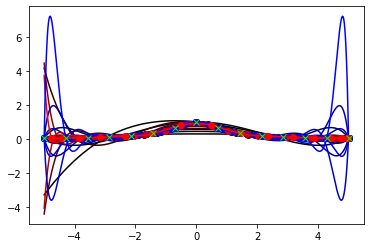

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.function_base import linspace

n = 10
a = -5
b = 5

x = linspace(-5,5,500)
orig_y = runge_func(x)
plt.plot(x,orig_y, color=[0,1,0])
nmin, nmax = 4,15
for n in range(nmin, nmax+1):
    colorfactor = (n-nmin)/(nmax-nmin+.001)
    xi = linspace(a,b,n)
    yi = runge_func(xi)
    divdiffs = divided_diff(xi, yi)[0,:]
    newton_y = pNewt(xi, divdiffs, x)
    plt.plot(x,newton_y,color=get_sweet_color(colorfactor, 0, 0, 1))
    plt.plot(xi, yi, 'o', color=get_sweet_color(colorfactor, 0, 0, 1))
    
    xi_tscheb = [x for x in make_cheb_xi(a,b,n)]
    yi_tscheb = [runge_func(x) for x in xi_tscheb]
    
    divdiffs_tscheb = divided_diff(xi_tscheb, yi_tscheb)[0,:]
    newton_y_tscheb = pNewt(xi_tscheb, divdiffs_tscheb, x)
    plt.plot(x,newton_y_tscheb,color=get_sweet_color(colorfactor,1,0,0))
    plt.plot(xi_tscheb, yi_tscheb, 'o', color=get_sweet_color(colorfactor,1,0,0))
plt.plot(xi, yi, 'x', color=[0,1,0])
plt.show()

---

In [10]:
import math
def runge_func(x):
    return 1/(1+x**2)

def make_cheb_xi(a:int,b:int,n:int):
    '''
    Get the optimal distribution of n interpolation points on the x-axis from a(left) to b(right)
    '''
    center = .5*(a+b)
    offset = .5*(b-a)
    for i in range (n):
        multiplier = math.cos(((2*i+1)/(2*n+2))*math.pi)
        yield center + offset * multiplier 

def divided_diff(x, y):
    '''
    Get the divided differences neede to calculate the newton polynomials from x and y values 
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
    return coef

def pNewt(xi, ai, x):
    '''
    Bulid the newton polynomial from the divided differences, interpolating at xi and f(xi), and return its y-values
    '''
    c = len(xi) -1
    p = ai[c]
    for i in range(1, c+1):
        p = ai[c-i] + (x-xi[c-i])*p
    return p

def get_sweet_color(n:float, r:int, g:int, b:int, scalar:float=1):
    result = []
    for factor in [r,g,b]:
        if factor == 0:
            result.append(0)
        elif factor == -1:
            result.append((1-n)*scalar)
        elif factor == 1:
            result.append(n*scalar)
        else:
            print("RGB 'weights' must be -1,0, or 1; got:", factor)
            exit(1)
    return result